# Drawing Conclusions: How Education Impacts Income Across the United States

## Project 1 - Group 6

In [1]:
# Import Dependencies
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats as st
from scipy import stats

In [2]:
# Read in education vs income csv
main_df = pd.read_csv("../Resources/education_vs_per_capita_income.csv")
main_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18


In [3]:
# Read in Cost of Living csv
COL_df = pd.read_csv("../Resources/Cost_of_Living_Index_Data.csv")
COL_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,28,Mississippi,63.07084,2959473,2960075,2961279,2961879,2967297,-0.00020,-602,-0.00264,83.3,92.2,66.3,90.4,86.7,91.4
1,20,Kansas,36.24443,2963308,2954832,2937880,2929402,2853118,0.00287,8476,0.03862,86.5,91.7,72.6,100.2,97.3,90.3
2,1,Alabama,100.65438,5097641,5073187,5024279,4999822,4779736,0.00482,24454,0.06651,87.9,98.2,70.1,100.7,92.7,94.1
3,40,Oklahoma,58.63041,4021753,4000953,3959353,3938551,3751351,0.00520,20800,0.07208,87.9,94.5,74.7,95.1,94.8,93.5
4,13,Georgia,191.59470,11019186,10916760,10711908,10609487,9687653,0.00938,102426,0.13745,88.8,95.9,74.4,90.5,92.6,96.6


In [4]:
# Dictionary containing state name and abbreviation
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [5]:
# replace the full name of the state w/ the abbrev in the COL df
new_COL_df = COL_df.replace({"state": us_state_to_abbrev})

In [6]:
new_COL_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,28,MS,63.07084,2959473,2960075,2961279,2961879,2967297,-0.00020,-602,-0.00264,83.3,92.2,66.3,90.4,86.7,91.4
1,20,KS,36.24443,2963308,2954832,2937880,2929402,2853118,0.00287,8476,0.03862,86.5,91.7,72.6,100.2,97.3,90.3
2,1,AL,100.65438,5097641,5073187,5024279,4999822,4779736,0.00482,24454,0.06651,87.9,98.2,70.1,100.7,92.7,94.1
3,40,OK,58.63041,4021753,4000953,3959353,3938551,3751351,0.00520,20800,0.07208,87.9,94.5,74.7,95.1,94.8,93.5
4,13,GA,191.59470,11019186,10916760,10711908,10609487,9687653,0.00938,102426,0.13745,88.8,95.9,74.4,90.5,92.6,96.6


In [7]:
# create a new df with only the state and costIndex columns
state_COL_df = new_COL_df[["state","costIndex"]]

In [8]:
state_COL_df.head()

,state,costIndex
0,MS,83.3
1,KS,86.5
2,AL,87.9
3,OK,87.9
4,GA,88.8


In [9]:
# merge our datasets on the state
merged_df = main_df.merge(state_COL_df, on="state")

In [10]:
# verifying that we did not loose any rows
merged_df.count()

county_FIPS                              3006
state                                    3006
county                                   3006
per_capita_personal_income_2019          3006
per_capita_personal_income_2020          3006
per_capita_personal_income_2021          3006
associate_degree_numbers_2016_2020       3006
bachelor_degree_numbers_2016_2020        3006
associate_degree_percentage_2016_2020    3006
bachelor_degree_percentage_2015_2019     3006
costIndex                                3006
dtype: int64

In [11]:
merged_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8


In [12]:
# creating a column for Adjusted Income
merged_df["Adjusted Per Capita Personal Income 2021"] = \
round(merged_df["per_capita_personal_income_2021"] / (merged_df["costIndex"]/100),2)

In [13]:
merged_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex,Adjusted Per Capita Personal Income 2021
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8,105700.39
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8,88658.15
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8,73330.06
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8,108822.20
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8,61840.86


In [14]:
# getting column names from DF to create filtered DF.
merged_df.columns

Index(['county_FIPS', 'state', 'county', 'per_capita_personal_income_2019',
       'per_capita_personal_income_2020', 'per_capita_personal_income_2021',
       'associate_degree_numbers_2016_2020',
       'bachelor_degree_numbers_2016_2020',
       'associate_degree_percentage_2016_2020',
       'bachelor_degree_percentage_2015_2019', 'costIndex',
       'Adjusted Per Capita Personal Income 2021'],
      dtype='object')

In [15]:
# take out columns that wont be used
final_df = merged_df[["state","county","per_capita_personal_income_2021","associate_degree_numbers_2016_2020",\
                     "bachelor_degree_numbers_2016_2020","associate_degree_percentage_2016_2020","bachelor_degree_percentage_2015_2019",\
                     "costIndex","Adjusted Per Capita Personal Income 2021"]].copy()

In [16]:
final_df.head()

,state,county,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex,Adjusted Per Capita Personal Income 2021
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.39
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.15
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.06
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.20
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.86


In [17]:
# creating a dictionary to rename columns
Column_dict = {"per_capita_personal_income_2021":"Per Capita Income 2021",
               "associate_degree_numbers_2016_2020":"Count of Associate Degrees",
               "bachelor_degree_numbers_2016_2020":"Count of Bachelor Degrees or Higher",
               "associate_degree_percentage_2016_2020":"Percent of Associate Degrees",
               "bachelor_degree_percentage_2015_2019":"Percent of Bachelor Degrees or Higher"
              }

In [18]:
# renaming columns
final_df.rename(columns = Column_dict, inplace=True)

In [19]:
final_df.head()

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of Associate Degrees,Percent of Bachelor Degrees or Higher,costIndex,Adjusted Per Capita Personal Income 2021
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.39
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.15
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.06
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.20
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.86


In [20]:
# adding column for no college percent
final_df['Percent of No College'] = 100 - final_df['Percent of Associate Degrees'] - final_df['Percent of Bachelor Degrees or Higher']
final_df['Count of Any College Degree'] = final_df["Count of Associate Degrees"]+final_df["Count of Bachelor Degrees or Higher"]

In [21]:
# Top 5 Counties for Adj. income
final_df = final_df.sort_values(by=['Adjusted Per Capita Personal Income 2021'])
final_df.head(5)

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of Associate Degrees,Percent of Bachelor Degrees or Higher,costIndex,Adjusted Per Capita Personal Income 2021,Percent of No College,Count of Any College Degree
167,CO,"Crowley, CO",24314,1206,360,29.17,8.71,105.3,23090.22,62.12,1566
2472,ID,"Madison, ID",25648,7083,6474,42.26,38.63,102.1,25120.47,19.11,13557
2293,FL,"Union, FL",25293,3232,1195,28.52,10.54,100.3,25217.35,60.94,4427
2912,HI,"Hawaii, HI",50038,315028,334489,31.62,33.57,193.3,25886.19,34.81,649517
488,CA,"Trinity, CA",36906,3631,1868,37.37,19.23,142.2,25953.59,43.40,5499


In [22]:
# Creating a column for total college and adding Asso. + Bach or higher %'s
final_df['Percent with Any College'] = final_df['Percent of Associate Degrees'] + final_df['Percent of Bachelor Degrees or Higher']

In [23]:
# rearranging columns
final_df = final_df.iloc[:,[0,1,2,8,3,4,9,11,5,6,10,7]]
final_df.head()

,state,county,Per Capita Income 2021,Adjusted Per Capita Personal Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of No College,Percent with Any College,Percent of Associate Degrees,Percent of Bachelor Degrees or Higher,Count of Any College Degree,costIndex
167,CO,"Crowley, CO",24314,23090.22,1206,360,62.12,37.88,29.17,8.71,1566,105.3
2472,ID,"Madison, ID",25648,25120.47,7083,6474,19.11,80.89,42.26,38.63,13557,102.1
2293,FL,"Union, FL",25293,25217.35,3232,1195,60.94,39.06,28.52,10.54,4427,100.3
2912,HI,"Hawaii, HI",50038,25886.19,315028,334489,34.81,65.19,31.62,33.57,649517,193.3
488,CA,"Trinity, CA",36906,25953.59,3631,1868,43.40,56.60,37.37,19.23,5499,142.2


In [24]:
# using the group by to find the averages by state
state_avgs = round(final_df.groupby(["state"]).mean(),2)
state_avgs.reset_index().head()

,state,Per Capita Income 2021,Adjusted Per Capita Personal Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of No College,Percent with Any College,Percent of Associate Degrees,Percent of Bachelor Degrees or Higher,Count of Any College Degree,costIndex
0,AK,68754.22,54094.59,6093.22,5273.26,44.90,55.10,32.67,22.43,11366.48,127.1
1,AL,44408.12,50521.18,15129.45,13090.21,51.80,48.20,29.61,18.59,28219.66,87.9
2,AR,43382.64,47725.68,15872.27,12844.91,53.70,46.30,29.31,16.99,28717.17,90.9
3,AZ,47794.80,46312.79,109163.40,97913.20,42.61,57.39,36.16,21.23,207076.60,103.2
4,CA,66942.03,47075.97,132592.19,159601.26,38.20,61.80,33.71,28.09,292193.45,142.2


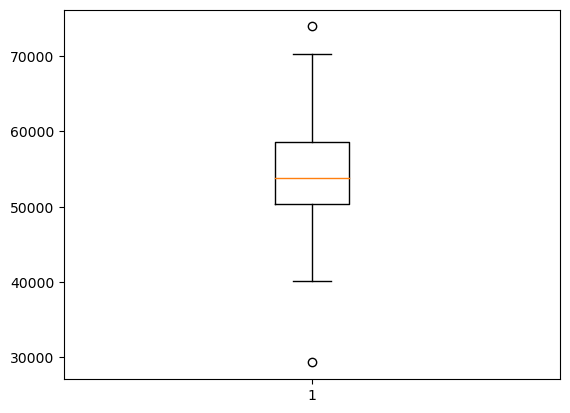

In [25]:
# Creating box and wisker plot to identify outliers in the dataset
plt.boxplot(state_avgs['Adjusted Per Capita Personal Income 2021'])
plt.show()

In [26]:
# Identifying outlier values
print(state_avgs["Adjusted Per Capita Personal Income 2021"].max())
print(state_avgs["Adjusted Per Capita Personal Income 2021"].min())

73922.08
29324.54


In [27]:
# Removing Outliers from data set
state_avgs = state_avgs[state_avgs["Adjusted Per Capita Personal Income 2021"] != 73922.08]
state_avgs = state_avgs[state_avgs["Adjusted Per Capita Personal Income 2021"] != 29324.54]

# COLLEGE VS NO COLLEGE ANALYSIS

In [28]:
### ANY COLLEGE ###
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent with Any College"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent with Any College"]+interecept

The R-Value is 0.3161328363890233


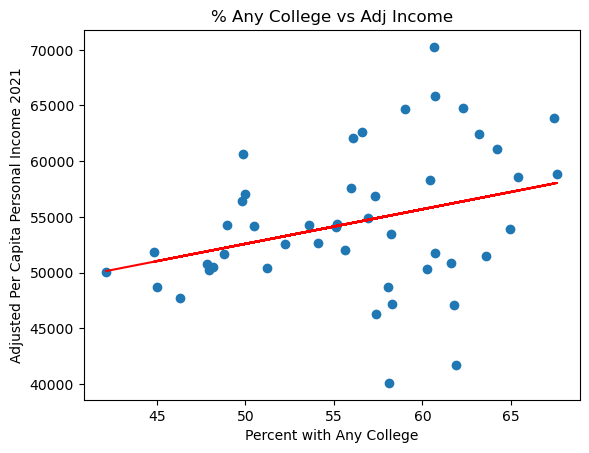

In [29]:
plt.scatter(state_avgs["Percent with Any College"],state_avgs["Adjusted Per Capita Personal Income 2021"])
x_axis = state_avgs["Percent with Any College"]
plt.plot(x_axis,y_pred,color="red")
plt.xlabel("Percent with Any College")
plt.ylabel("Adjusted Per Capita Personal Income 2021")
plt.title("% Any College vs Adj Income")
print(f'The R-Value is {rvalue}')
plt.savefig("../Outputs/AnyCollege_Fig.png")
plt.show()

In [30]:
### NO COLLEGE ###
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent of No College"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent of No College"]+interecept

The R-Value is -0.3161328363890232


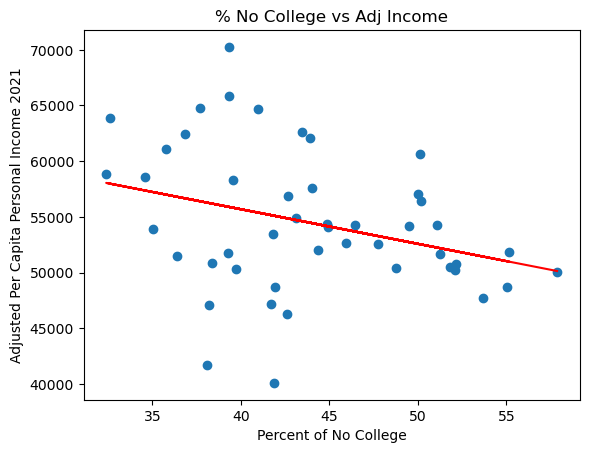

In [31]:
plt.scatter(state_avgs["Percent of No College"],state_avgs["Adjusted Per Capita Personal Income 2021"])
x_axis = state_avgs["Percent of No College"]
plt.plot(x_axis,y_pred,color="red")
plt.xlabel("Percent of No College")
plt.ylabel("Adjusted Per Capita Personal Income 2021")
plt.title("% No College vs Adj Income")
print(f'The R-Value is {rvalue}')
plt.savefig("../Outputs/NoCollege_Fig.png")
plt.show()

# College Degree Analysis

In [32]:
### ASSOCIATE DEGREES ###
# finding correlation coefficient
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent of Associate Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent of Associate Degrees"]+interecept

The R-Value is 0.04758890652182896


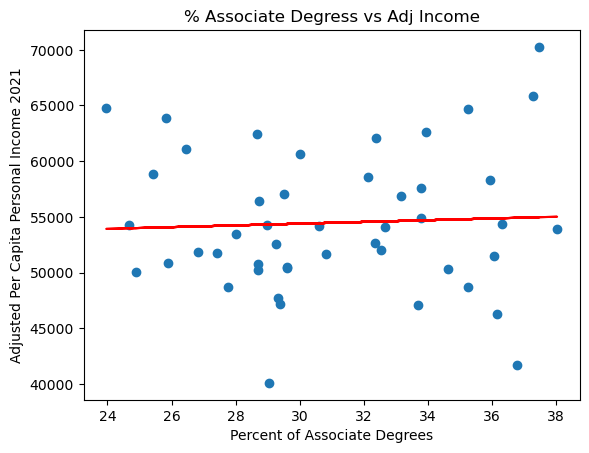

In [33]:
plt.scatter(state_avgs["Percent of Associate Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
x_axis = state_avgs["Percent of Associate Degrees"]
plt.plot(x_axis,y_pred,color="red")
plt.xlabel("Percent of Associate Degrees")
plt.ylabel("Adjusted Per Capita Personal Income 2021")
plt.title("% Associate Degress vs Adj Income")
print(f'The R-Value is {rvalue}')
plt.savefig("../Outputs/Associate_Fig.png")
plt.show()

In [34]:
### BACHELOR OR HIGHER ###
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent of Bachelor Degrees or Higher"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent of Bachelor Degrees or Higher"]+interecept

The R-Value is 0.28510351732101147


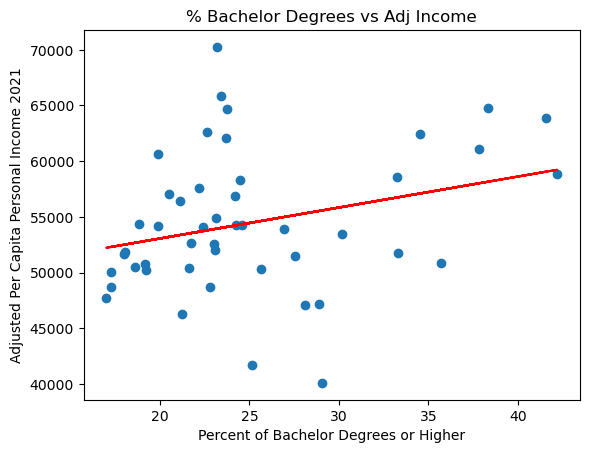

In [35]:
plt.scatter(state_avgs["Percent of Bachelor Degrees or Higher"],state_avgs["Adjusted Per Capita Personal Income 2021"])
x_axis = state_avgs["Percent of Bachelor Degrees or Higher"]
plt.plot(x_axis,y_pred,color="red")
plt.xlabel("Percent of Bachelor Degrees or Higher")
plt.ylabel("Adjusted Per Capita Personal Income 2021")
plt.title("% Bachelor Degrees vs Adj Income")
print(f'The R-Value is {rvalue}')
plt.savefig("../Outputs/Bachelor_Fig.png")
plt.show()

# ANALYSIS BY REGION 

In [36]:
# Use the Pandas copy function to create DataFrame called region_df to store region
region_df= final_df.copy()
# Add an empty column, "region," to the DataFrame so you can store the region the state belong
region_df['region']= ""
# Display sample data
region_df

,state,county,Per Capita Income 2021,Adjusted Per Capita Personal Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of No College,Percent with Any College,Percent of Associate Degrees,Percent of Bachelor Degrees or Higher,Count of Any College Degree,costIndex,region
167,CO,"Crowley, CO",24314,23090.22,1206,360,62.12,37.88,29.17,8.71,1566,105.3,
2472,ID,"Madison, ID",25648,25120.47,7083,6474,19.11,80.89,42.26,38.63,13557,102.1,
2293,FL,"Union, FL",25293,25217.35,3232,1195,60.94,39.06,28.52,10.54,4427,100.3,
2912,HI,"Hawaii, HI",50038,25886.19,315028,334489,34.81,65.19,31.62,33.57,649517,193.3,
488,CA,"Trinity, CA",36906,25953.59,3631,1868,43.40,56.60,37.37,19.23,5499,142.2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,TX,"Glasscock, TX",124963,135681.87,197,238,53.48,46.52,21.07,25.45,435,92.1,
1395,TX,"Midland, TX",126738,137609.12,32703,29348,41.98,58.02,30.58,27.44,62051,92.1,
694,UT,"Summit, UT",183972,185830.30,6446,15670,20.80,79.20,23.08,56.12,22116,99.0,
105,CO,"Pitkin, CO",198939,188925.93,2932,8459,17.63,82.37,21.20,61.17,11391,105.3,


In [37]:
# Add region to the DataFrame

South= ['WV', 'DC', 'MD', 'VA', 'KY', 'TN', 'NC', 'MS', 'AR', 'LA', 'AL', 'GA', 'SC', 'FL', 'DE']   
Southwest= ['AZ', 'NM', 'OK', 'TX']    
West= ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AK', 'HI']    
Midwest= ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH']    
Northeast= ['ME', 'VT', 'NY', 'NH', 'MA', 'RI', 'CT', 'NJ', 'PA']


region_df['region'] = np.where(region_df['state'].isin(South), 'South', np. NaN)
region_df['region'] = np.where(region_df['state'].isin(Southwest), 'Southwest', region_df['region'])                               
region_df['region'] = np.where(region_df['state'].isin(West), 'West', region_df['region'])                               
region_df['region'] = np.where(region_df['state'].isin(Midwest), 'Midwest', region_df['region'] )                              
region_df['region'] = np.where(region_df['state'].isin(Northeast), 'Northeast', region_df['region'])


region_df.head()    
        
      

,state,county,Per Capita Income 2021,Adjusted Per Capita Personal Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of No College,Percent with Any College,Percent of Associate Degrees,Percent of Bachelor Degrees or Higher,Count of Any College Degree,costIndex,region
167,CO,"Crowley, CO",24314,23090.22,1206,360,62.12,37.88,29.17,8.71,1566,105.3,West
2472,ID,"Madison, ID",25648,25120.47,7083,6474,19.11,80.89,42.26,38.63,13557,102.1,West
2293,FL,"Union, FL",25293,25217.35,3232,1195,60.94,39.06,28.52,10.54,4427,100.3,South
2912,HI,"Hawaii, HI",50038,25886.19,315028,334489,34.81,65.19,31.62,33.57,649517,193.3,West
488,CA,"Trinity, CA",36906,25953.59,3631,1868,43.40,56.60,37.37,19.23,5499,142.2,West


In [38]:
# Grouping by Region
region_avg_df = round(region_df.groupby(["region"],as_index=False).mean(),2)
region_avg_df

,region,Per Capita Income 2021,Adjusted Per Capita Personal Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of No College,Percent with Any College,Percent of Associate Degrees,Percent of Bachelor Degrees or Higher,Count of Any College Degree,costIndex
0,Midwest,55209.32,59334.96,14030.19,14314.23,44.39,55.61,33.15,22.46,28344.42,92.99
1,Northeast,61969.32,51644.47,43861.17,68162.88,42.79,57.21,26.60,30.61,112024.05,122.12
2,South,47158.38,50826.33,17521.46,18087.24,51.09,48.91,28.94,19.97,35608.70,92.70
3,Southwest,53178.83,58075.70,21732.97,21621.46,49.35,50.65,30.57,20.08,43354.43,91.59
4,West,58621.42,52234.33,37561.33,42336.20,38.44,61.56,34.80,26.75,79897.53,113.70


In [39]:
region_plot_df = region_avg_df[["region","Adjusted Per Capita Personal Income 2021","Count of Any College Degree"]]
region_plot_df.head()

,region,Adjusted Per Capita Personal Income 2021,Count of Any College Degree
0,Midwest,59334.96,28344.42
1,Northeast,51644.47,112024.05
2,South,50826.33,35608.70
3,Southwest,58075.70,43354.43
4,West,52234.33,79897.53


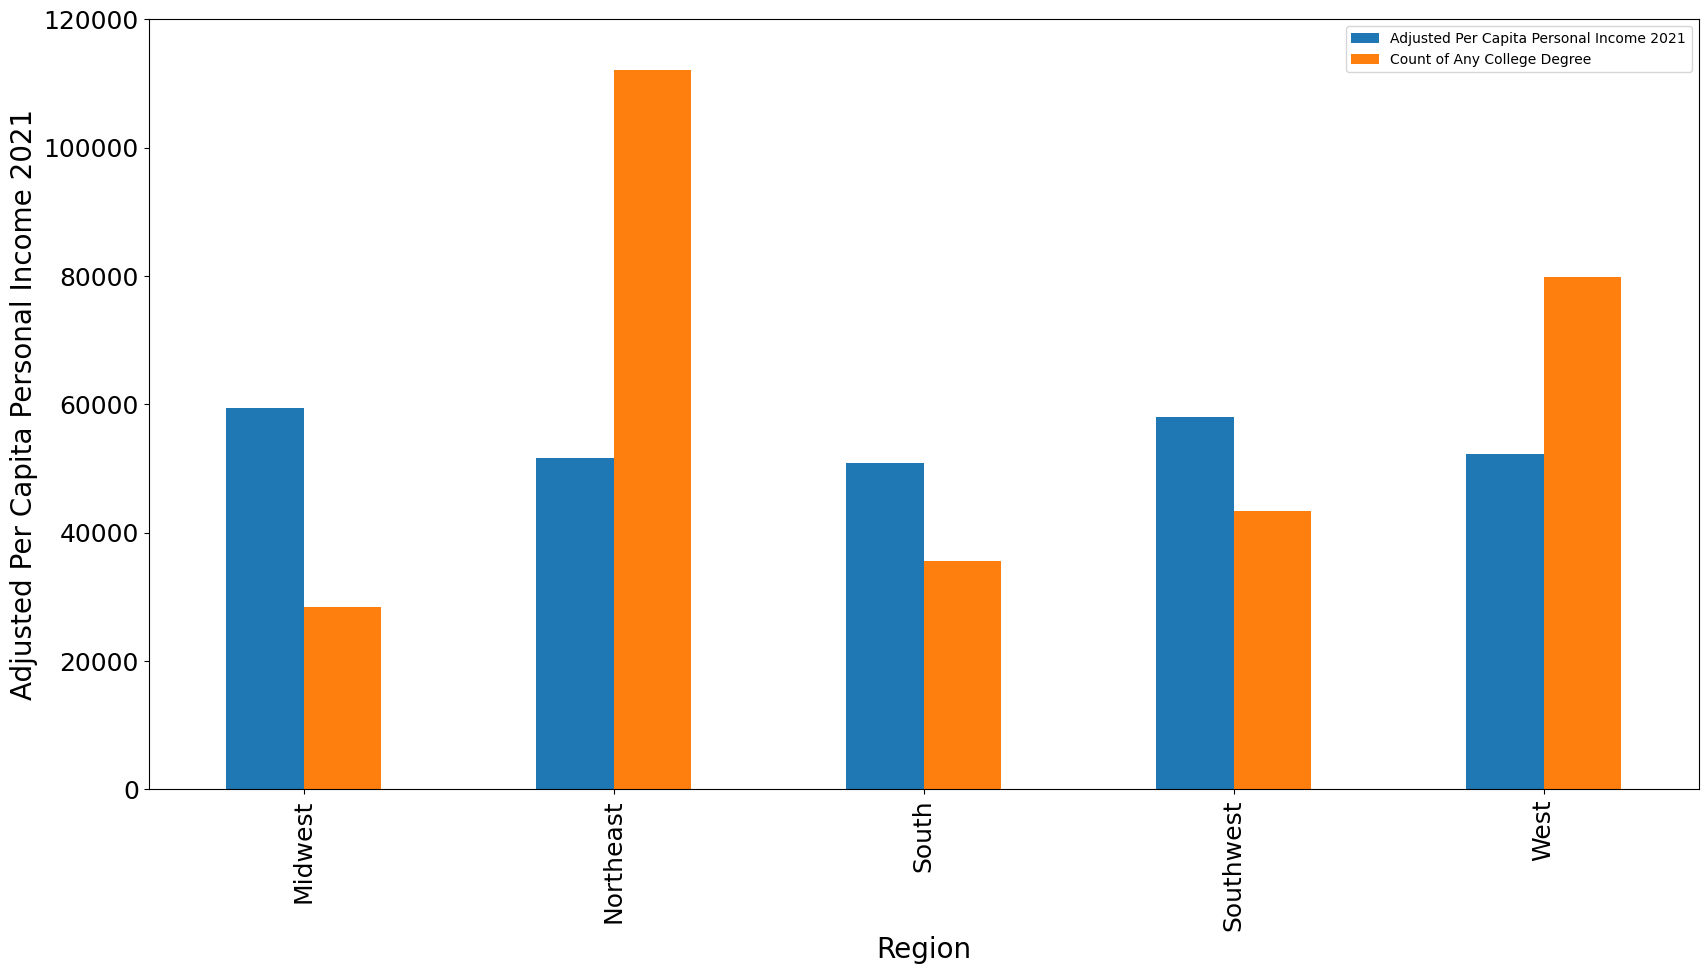

In [41]:
region_plot_df.plot.bar(x='region',figsize= (20,10), fontsize=18)
plt.xlabel("Region", fontsize=20)
plt.ylabel("Adjusted Per Capita Personal Income 2021", fontsize=20)
plt.ylim(0, 120000)
plt.savefig("../Outputs/Region_Fig1.png")
plt.show()

# CREATING MAP OF COUNTIES USING API

In [29]:
# import dependencies
import requests
import json
# Import the API key
from config import geoapify_key
from pprint import pprint

In [34]:
# adding empty columns for latitude and longitude
final_df['Lat']= " "
final_df['Lng']= " "

In [35]:
# Defining parameters for search
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [38]:
# Using for loop to call API to find Lat/Lng for each row in the DF.
print("Starting search")
for index, row in final_df.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    search_county = row['county']
    
    # Add the current city to the parameters
    params["text"] = search_county

    # Make the API request
    response = requests.get(base_url,params=params)
    
    # Convert reponse to JSON
    response = response.json()
    
    # add lat and long to dataframe
    try:
        final_df.loc[index, "Lat"] = response['results'][0]['lat']
        final_df.loc[index, "Lng"] = response['results'][0]['lon']
    except (KeyError, IndexError):
        print(f'no data found for {search_county}')
    print(f'The coordinates for {search_county} are fetching....')

Starting search
The coordinates for Arlington, VA are fetching....
The coordinates for Loudoun, VA are fetching....
The coordinates for Henrico, VA are fetching....
The coordinates for Goochland, VA are fetching....
The coordinates for Stafford, VA are fetching....
The coordinates for Hanover, VA are fetching....
The coordinates for Chesterfield, VA are fetching....
The coordinates for Fauquier, VA are fetching....
The coordinates for Fluvanna, VA are fetching....
The coordinates for King George, VA are fetching....
The coordinates for Clarke, VA are fetching....
The coordinates for Rappahannock, VA are fetching....
The coordinates for Lancaster, VA are fetching....
The coordinates for Northumberland, VA are fetching....
The coordinates for New Kent, VA are fetching....
The coordinates for Nelson, VA are fetching....
The coordinates for Bedford, VA are fetching....
The coordinates for Highland, VA are fetching....
The coordinates for Powhatan, VA are fetching....
The coordinates for Gr

The coordinates for Lincoln, CO are fetching....
The coordinates for Crowley, CO are fetching....
The coordinates for Howard, MD are fetching....
The coordinates for Montgomery, MD are fetching....
The coordinates for Anne Arundel, MD are fetching....
The coordinates for Frederick, MD are fetching....
The coordinates for Baltimore, MD are fetching....
The coordinates for Talbot, MD are fetching....
The coordinates for Carroll, MD are fetching....
The coordinates for Harford, MD are fetching....
The coordinates for Queen Anne's, MD are fetching....
The coordinates for Kent, MD are fetching....
The coordinates for Prince George's, MD are fetching....
The coordinates for Calvert, MD are fetching....
The coordinates for St. Mary's, MD are fetching....
The coordinates for Charles, MD are fetching....
The coordinates for Worcester, MD are fetching....
The coordinates for Wicomico, MD are fetching....
The coordinates for Cecil, MD are fetching....
The coordinates for Garrett, MD are fetching.

The coordinates for Rockingham, NC are fetching....
The coordinates for Northampton, NC are fetching....
The coordinates for Martin, NC are fetching....
The coordinates for Halifax, NC are fetching....
The coordinates for Duplin, NC are fetching....
The coordinates for Bertie, NC are fetching....
The coordinates for Sampson, NC are fetching....
The coordinates for Alexander, NC are fetching....
The coordinates for Jones, NC are fetching....
The coordinates for Robeson, NC are fetching....
The coordinates for Stokes, NC are fetching....
The coordinates for Graham, NC are fetching....
The coordinates for Yadkin, NC are fetching....
The coordinates for Columbus, NC are fetching....
The coordinates for Washington, NC are fetching....
The coordinates for Gates, NC are fetching....
The coordinates for Anson, NC are fetching....
The coordinates for Tyrrell, NC are fetching....
The coordinates for Hyde, NC are fetching....
The coordinates for Greene, NC are fetching....
The coordinates for Wil

The coordinates for Colusa, CA are fetching....
The coordinates for Tulare, CA are fetching....
The coordinates for Glenn, CA are fetching....
The coordinates for Merced, CA are fetching....
The coordinates for Lassen, CA are fetching....
The coordinates for Hamilton, IN are fetching....
The coordinates for Boone, IN are fetching....
The coordinates for Monroe, IN are fetching....
The coordinates for Tippecanoe, IN are fetching....
The coordinates for Hendricks, IN are fetching....
The coordinates for Bartholomew, IN are fetching....
The coordinates for Warrick, IN are fetching....
The coordinates for Johnson, IN are fetching....
The coordinates for Marion, IN are fetching....
The coordinates for Hancock, IN are fetching....
The coordinates for St. Joseph, IN are fetching....
The coordinates for Floyd, IN are fetching....
The coordinates for Brown, IN are fetching....
The coordinates for Allen, IN are fetching....
The coordinates for Porter, IN are fetching....
The coordinates for Vand

The coordinates for Shiawassee, MI are fetching....
The coordinates for Menominee, MI are fetching....
The coordinates for Newaygo, MI are fetching....
The coordinates for Ionia, MI are fetching....
The coordinates for Gratiot, MI are fetching....
The coordinates for Roscommon, MI are fetching....
The coordinates for St. Joseph, MI are fetching....
The coordinates for Huron, MI are fetching....
The coordinates for Missaukee, MI are fetching....
The coordinates for Iosco, MI are fetching....
The coordinates for Ontonagon, MI are fetching....
The coordinates for Baraga, MI are fetching....
The coordinates for Osceola, MI are fetching....
The coordinates for Branch, MI are fetching....
The coordinates for Sanilac, MI are fetching....
The coordinates for Montmorency, MI are fetching....
The coordinates for Montcalm, MI are fetching....
The coordinates for Kalkaska, MI are fetching....
The coordinates for Gladwin, MI are fetching....
The coordinates for Lake, MI are fetching....
The coordin

The coordinates for Sussex, NJ are fetching....
The coordinates for Essex, NJ are fetching....
The coordinates for Warren, NJ are fetching....
The coordinates for Gloucester, NJ are fetching....
The coordinates for Cape May, NJ are fetching....
The coordinates for Camden, NJ are fetching....
The coordinates for Ocean, NJ are fetching....
The coordinates for Passaic, NJ are fetching....
The coordinates for Atlantic, NJ are fetching....
The coordinates for Salem, NJ are fetching....
The coordinates for Cumberland, NJ are fetching....
The coordinates for Delaware, OH are fetching....
The coordinates for Warren, OH are fetching....
The coordinates for Franklin, OH are fetching....
The coordinates for Greene, OH are fetching....
The coordinates for Hamilton, OH are fetching....
The coordinates for Geauga, OH are fetching....
The coordinates for Union, OH are fetching....
The coordinates for Wood, OH are fetching....
The coordinates for Medina, OH are fetching....
The coordinates for Cuyahog

The coordinates for Carroll, GA are fetching....
The coordinates for Peach, GA are fetching....
The coordinates for Gilmer, GA are fetching....
The coordinates for Baker, GA are fetching....
The coordinates for Floyd, GA are fetching....
The coordinates for Habersham, GA are fetching....
The coordinates for Newton, GA are fetching....
The coordinates for Jones, GA are fetching....
The coordinates for White, GA are fetching....
The coordinates for Barrow, GA are fetching....
The coordinates for Troup, GA are fetching....
The coordinates for Sumter, GA are fetching....
The coordinates for Bartow, GA are fetching....
The coordinates for Lanier, GA are fetching....
The coordinates for Oglethorpe, GA are fetching....
The coordinates for Pike, GA are fetching....
The coordinates for Liberty, GA are fetching....
The coordinates for Madison, GA are fetching....
The coordinates for Walker, GA are fetching....
The coordinates for Clayton, GA are fetching....
The coordinates for Miller, GA are fe

The coordinates for Calhoun, IA are fetching....
The coordinates for Wapello, IA are fetching....
The coordinates for Jackson, IA are fetching....
The coordinates for Ringgold, IA are fetching....
The coordinates for Floyd, IA are fetching....
The coordinates for Adair, IA are fetching....
The coordinates for Clinton, IA are fetching....
The coordinates for Lyon, IA are fetching....
The coordinates for Jasper, IA are fetching....
The coordinates for Harrison, IA are fetching....
The coordinates for Fremont, IA are fetching....
The coordinates for Audubon, IA are fetching....
The coordinates for Davis, IA are fetching....
The coordinates for Emmet, IA are fetching....
The coordinates for Franklin, IA are fetching....
The coordinates for Howard, IA are fetching....
The coordinates for Lee, IA are fetching....
The coordinates for Keokuk, IA are fetching....
The coordinates for Appanoose, IA are fetching....
The coordinates for Fayette, IA are fetching....
The coordinates for Kossuth, IA a

The coordinates for Klamath, OR are fetching....
The coordinates for Grant, OR are fetching....
The coordinates for Wasco, OR are fetching....
The coordinates for Sherman, OR are fetching....
The coordinates for Coos, OR are fetching....
The coordinates for Linn, OR are fetching....
The coordinates for Lake, OR are fetching....
The coordinates for Wheeler, OR are fetching....
The coordinates for Crook, OR are fetching....
The coordinates for Douglas, OR are fetching....
The coordinates for Josephine, OR are fetching....
The coordinates for Columbia, OR are fetching....
The coordinates for Umatilla, OR are fetching....
The coordinates for Harney, OR are fetching....
The coordinates for Malheur, OR are fetching....
The coordinates for Morrow, OR are fetching....
The coordinates for Collin, TX are fetching....
The coordinates for Travis, TX are fetching....
The coordinates for Fort Bend, TX are fetching....
The coordinates for Denton, TX are fetching....
The coordinates for Kendall, TX ar

The coordinates for Motley, TX are fetching....
The coordinates for Ochiltree, TX are fetching....
The coordinates for Marion, TX are fetching....
The coordinates for Limestone, TX are fetching....
The coordinates for Haskell, TX are fetching....
The coordinates for Ector, TX are fetching....
The coordinates for Runnels, TX are fetching....
The coordinates for Castro, TX are fetching....
The coordinates for Culberson, TX are fetching....
The coordinates for Brooks, TX are fetching....
The coordinates for Hardeman, TX are fetching....
The coordinates for Jim Wells, TX are fetching....
The coordinates for Scurry, TX are fetching....
The coordinates for Schleicher, TX are fetching....
The coordinates for Orange, TX are fetching....
The coordinates for Rusk, TX are fetching....
The coordinates for Goliad, TX are fetching....
The coordinates for Swisher, TX are fetching....
The coordinates for Karnes, TX are fetching....
The coordinates for San Patricio, TX are fetching....
The coordinates 

The coordinates for Trempealeau, WI are fetching....
The coordinates for Crawford, WI are fetching....
The coordinates for Lincoln, WI are fetching....
The coordinates for Dodge, WI are fetching....
The coordinates for Menominee, WI are fetching....
The coordinates for Oconto, WI are fetching....
The coordinates for Rusk, WI are fetching....
The coordinates for Price, WI are fetching....
The coordinates for Waushara, WI are fetching....
The coordinates for Langlade, WI are fetching....
The coordinates for Marinette, WI are fetching....
The coordinates for Shawano, WI are fetching....
The coordinates for Taylor, WI are fetching....
The coordinates for Jackson, WI are fetching....
The coordinates for Forest, WI are fetching....
The coordinates for Juneau, WI are fetching....
The coordinates for Adams, WI are fetching....
The coordinates for Marquette, WI are fetching....
The coordinates for Clark, WI are fetching....
The coordinates for Gallatin, MT are fetching....
The coordinates for M

The coordinates for Monroe, IL are fetching....
The coordinates for Kendall, IL are fetching....
The coordinates for Jackson, IL are fetching....
The coordinates for McHenry, IL are fetching....
The coordinates for Will, IL are fetching....
The coordinates for Kane, IL are fetching....
The coordinates for Sangamon, IL are fetching....
The coordinates for Woodford, IL are fetching....
The coordinates for DeKalb, IL are fetching....
The coordinates for McDonough, IL are fetching....
The coordinates for Peoria, IL are fetching....
The coordinates for Piatt, IL are fetching....
The coordinates for St. Clair, IL are fetching....
The coordinates for Madison, IL are fetching....
The coordinates for Jo Daviess, IL are fetching....
The coordinates for Coles, IL are fetching....
The coordinates for Tazewell, IL are fetching....
The coordinates for Williamson, IL are fetching....
The coordinates for Grundy, IL are fetching....
The coordinates for Adams, IL are fetching....
The coordinates for Jer

The coordinates for Yazoo, MS are fetching....
The coordinates for Holmes, MS are fetching....
The coordinates for Tallahatchie, MS are fetching....
The coordinates for Calhoun, MS are fetching....
The coordinates for Scott, MS are fetching....
The coordinates for Quitman, MS are fetching....
The coordinates for Greene, MS are fetching....
The coordinates for Perry, MS are fetching....
The coordinates for Benton, MS are fetching....
The coordinates for Issaquena, MS are fetching....
The coordinates for Newport, RI are fetching....
The coordinates for Bristol, RI are fetching....
The coordinates for Washington, RI are fetching....
The coordinates for Kent, RI are fetching....
The coordinates for Providence, RI are fetching....
The coordinates for Fairfield, CT are fetching....
The coordinates for Middlesex, CT are fetching....
The coordinates for Tolland, CT are fetching....
The coordinates for Hartford, CT are fetching....
The coordinates for New Haven, CT are fetching....
The coordina

The coordinates for Lawrence, MO are fetching....
The coordinates for DeKalb, MO are fetching....
The coordinates for Maries, MO are fetching....
The coordinates for Knox, MO are fetching....
The coordinates for Harrison, MO are fetching....
The coordinates for Henry, MO are fetching....
The coordinates for Reynolds, MO are fetching....
The coordinates for Ralls, MO are fetching....
The coordinates for Sullivan, MO are fetching....
The coordinates for Carter, MO are fetching....
The coordinates for Barry, MO are fetching....
The coordinates for Caldwell, MO are fetching....
The coordinates for Pike, MO are fetching....
The coordinates for Laclede, MO are fetching....
The coordinates for Dent, MO are fetching....
The coordinates for Oregon, MO are fetching....
The coordinates for Scotland, MO are fetching....
The coordinates for Bates, MO are fetching....
The coordinates for Texas, MO are fetching....
The coordinates for Benton, MO are fetching....
The coordinates for St. Clair, MO are 

The coordinates for Woodford, KY are fetching....
The coordinates for Jefferson, KY are fetching....
The coordinates for Kenton, KY are fetching....
The coordinates for Warren, KY are fetching....
The coordinates for Boone, KY are fetching....
The coordinates for Madison, KY are fetching....
The coordinates for Calloway, KY are fetching....
The coordinates for Franklin, KY are fetching....
The coordinates for Scott, KY are fetching....
The coordinates for Jessamine, KY are fetching....
The coordinates for Shelby, KY are fetching....
The coordinates for Boyle, KY are fetching....
The coordinates for Rowan, KY are fetching....
The coordinates for McCracken, KY are fetching....
The coordinates for Daviess, KY are fetching....
The coordinates for Taylor, KY are fetching....
The coordinates for Bourbon, KY are fetching....
The coordinates for Hickman, KY are fetching....
The coordinates for Anderson, KY are fetching....
The coordinates for Hardin, KY are fetching....
The coordinates for Spe

The coordinates for Elmore, AL are fetching....
The coordinates for Lauderdale, AL are fetching....
The coordinates for Limestone, AL are fetching....
The coordinates for Mobile, AL are fetching....
The coordinates for Houston, AL are fetching....
The coordinates for Coffee, AL are fetching....
The coordinates for Morgan, AL are fetching....
The coordinates for Marshall, AL are fetching....
The coordinates for Macon, AL are fetching....
The coordinates for Henry, AL are fetching....
The coordinates for Calhoun, AL are fetching....
The coordinates for Tallapoosa, AL are fetching....
The coordinates for Crenshaw, AL are fetching....
The coordinates for Sumter, AL are fetching....
The coordinates for Dale, AL are fetching....
The coordinates for St. Clair, AL are fetching....
The coordinates for Perry, AL are fetching....
The coordinates for Etowah, AL are fetching....
The coordinates for Russell, AL are fetching....
The coordinates for Colbert, AL are fetching....
The coordinates for Mar

The coordinates for Benson, ND are fetching....
The coordinates for Divide, ND are fetching....
The coordinates for Hettinger, ND are fetching....
The coordinates for McIntosh, ND are fetching....
The coordinates for Sheridan, ND are fetching....
The coordinates for Sioux, ND are fetching....
The coordinates for Towner, ND are fetching....
The coordinates for Sarpy, NE are fetching....
The coordinates for Douglas, NE are fetching....
The coordinates for Lancaster, NE are fetching....
The coordinates for Dawes, NE are fetching....
The coordinates for Buffalo, NE are fetching....
The coordinates for Washington, NE are fetching....
The coordinates for Wayne, NE are fetching....
The coordinates for Seward, NE are fetching....
The coordinates for Rock, NE are fetching....
The coordinates for Cass, NE are fetching....
The coordinates for Garfield, NE are fetching....
The coordinates for Gosper, NE are fetching....
The coordinates for Dundy, NE are fetching....
The coordinates for Nemaha, NE 

The coordinates for Pottawatomie, OK are fetching....
The coordinates for Woodward, OK are fetching....
The coordinates for Blaine, OK are fetching....
The coordinates for Kay, OK are fetching....
The coordinates for Osage, OK are fetching....
The coordinates for Murray, OK are fetching....
The coordinates for Stephens, OK are fetching....
The coordinates for Pittsburg, OK are fetching....
The coordinates for Delaware, OK are fetching....
The coordinates for Kiowa, OK are fetching....
The coordinates for Harmon, OK are fetching....
The coordinates for Roger Mills, OK are fetching....
The coordinates for Pawnee, OK are fetching....
The coordinates for Coal, OK are fetching....
The coordinates for Beckham, OK are fetching....
The coordinates for Tillman, OK are fetching....
The coordinates for Atoka, OK are fetching....
The coordinates for Creek, OK are fetching....
The coordinates for Garvin, OK are fetching....
The coordinates for Le Flore, OK are fetching....
The coordinates for Haske

In [39]:
final_df.head()

,state,county,Per Capita Income 2021,Adjusted Per Capita Personal Income 2021,Count of Associate Degrees,Count of Bachelor Degrees or Higher,Percent of No College,Percent of Associate Degrees,Percent of Bachelor Degrees of Higher,costIndex,Lat,Lng
0,VA,"Arlington, VA",107603,105700.39,19573,132394,12.95,11.21,75.84,101.8,38.890396,-77.084159
1,VA,"Loudoun, VA",90254,88658.15,52006,160853,18.46,19.92,61.62,101.8,39.098459,-77.670501
2,VA,"Henrico, VA",74650,73330.06,60829,101632,29.25,26.49,44.26,101.8,37.495702,-77.335257
3,VA,"Goochland, VA",110781,108822.20,4586,7705,30.12,26.07,43.81,101.8,37.682444,-77.884925
4,VA,"Stafford, VA",62954,61840.86,28316,39872,29.29,29.36,41.35,101.8,38.422268,-77.408407


In [40]:
# exporting API results to CSV
final_df.to_csv('../Resources/country_loc.csv')